In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#get the data
data = pd.read_csv(r"C:\Users\SOFT LAPTOP\Downloads\airlines_flights_data.csv")

In [3]:
#explore the data
data


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
#get info about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
#delete index column 
data.drop(columns="index",inplace=True)
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
#get describtive analytics 
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
print(data[data["duration"]==49.830000])

          airline  flight source_city departure_time        stops  \
193889  Air_India  AI-672     Chennai        Evening  two_or_more   
194359  Air_India  AI-672     Chennai        Evening          one   

       arrival_time destination_city    class  duration  days_left  price  
193889      Evening        Bangalore  Economy     49.83          2  23891  
194359      Evening        Bangalore  Economy     49.83          9  17538  


In [8]:
#checking the nulls 
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
# the airlines and their frequencies 
data["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [10]:
# the airlines and their frequencies 
frequencies=data["airline"].value_counts()

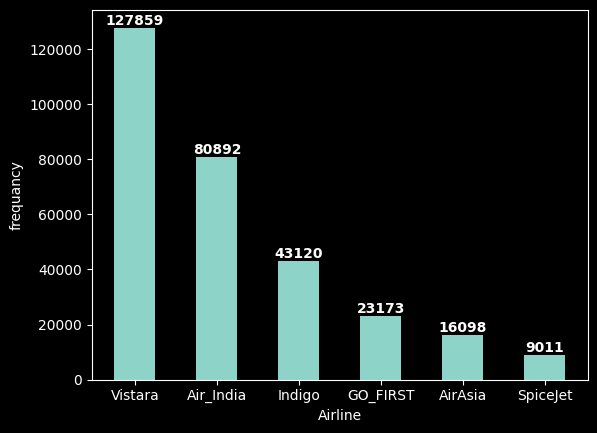

In [21]:
plt.bar(frequencies.index,frequencies.values,width=.5)

for i, value in enumerate(frequencies.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Airline")
plt.ylabel("frequancy")
plt.show()

In [12]:
#frequecies of departure_time and arrival_time
departure = data["departure_time"].value_counts()
arrival = data["arrival_time"].value_counts()

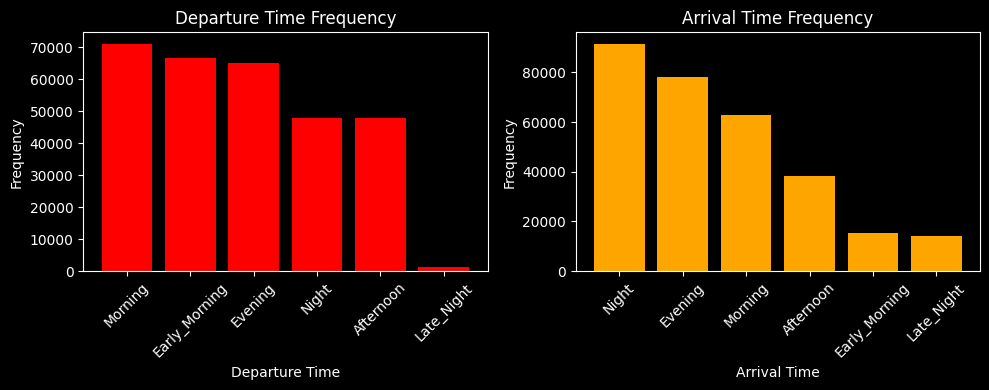

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  


axes[0].bar(departure.index, departure.values,color = 'red')
axes[0].set_ylabel("Frequency")         
axes[0].set_xlabel("Departure Time")     
axes[0].set_title("Departure Time Frequency")
axes[0].tick_params(axis='x', rotation=45)   


axes[1].bar(arrival.index, arrival.values, color='orange')
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Arrival Time")
axes[1].set_title("Arrival Time Frequency")
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()          

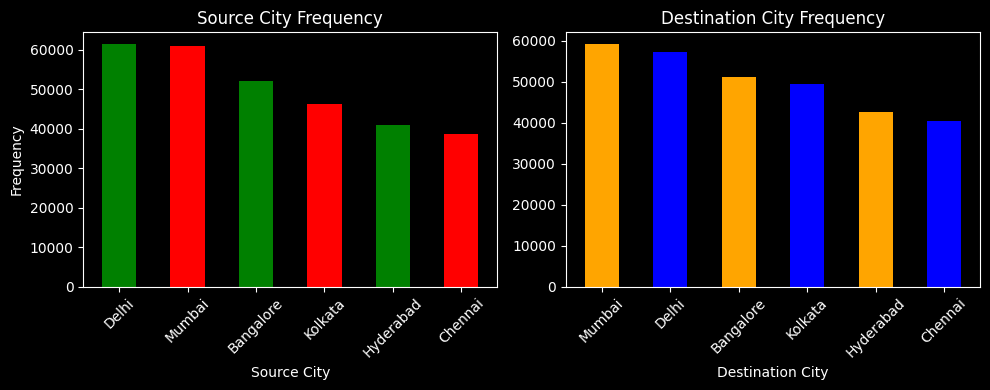

In [14]:
#showing the source_city and the distination_city frequencies
source_city_freq = data["source_city"].value_counts()
destination_city_freq = data["destination_city"].value_counts()


figure, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].bar(source_city_freq.index, source_city_freq.values, color=["green","red"], width=0.5)
ax[0].set_xlabel("Source City")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Source City Frequency")
ax[0].tick_params(axis='x', rotation=45)



ax[1].bar(destination_city_freq.index, destination_city_freq.values, color=["orange","blue"], width=0.5)
ax[1].set_xlabel("Destination City")
ax[1].set_title("Destination City Frequency")
ax[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

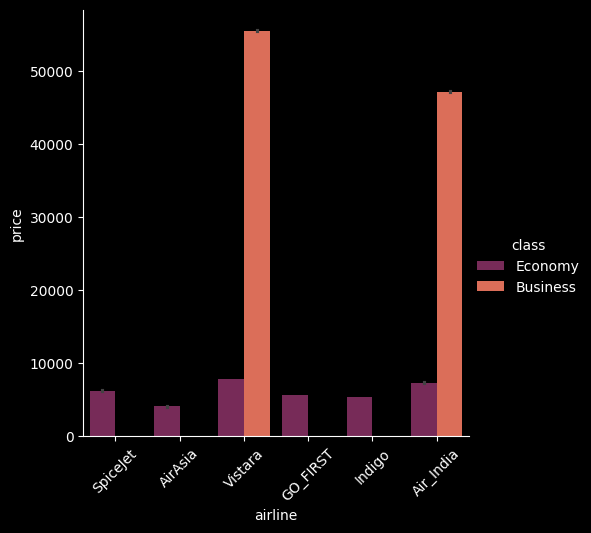

In [15]:
#showing the mean price of the each airline
plt.figure(figsize=(6,4))
sns.catplot(x='airline',y='price',data=data,kind='bar',palette='rocket',hue='class')
plt.xlabel("airline")
plt.ylabel("price")
plt.tick_params(axis='x',rotation=45)
plt.show()

In [16]:
# Does the price changes by the time ??
departure_time_price = data.groupby(['departure_time','class'])['price'].mean().reset_index()
arrival_time_price = data.groupby(['arrival_time','class'])['price'].mean().reset_index()
departure_time_price 

,departure_time,class,price
0,Afternoon,Business,51056.863495
1,Afternoon,Economy,6473.095872
2,Early_Morning,Business,52446.000050
3,Early_Morning,Economy,6560.315392
4,Evening,Business,52695.837090
5,Evening,Economy,6360.750741
6,Late_Night,Business,47471.971014
7,Late_Night,Economy,4784.699486
8,Morning,Business,53365.483091
9,Morning,Economy,7119.019664


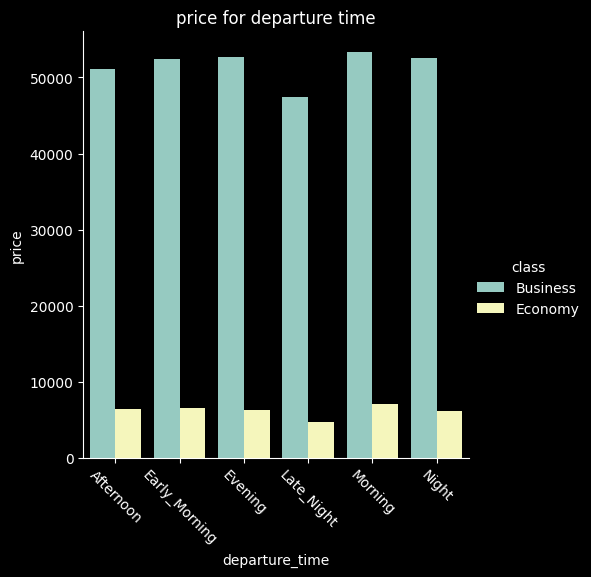

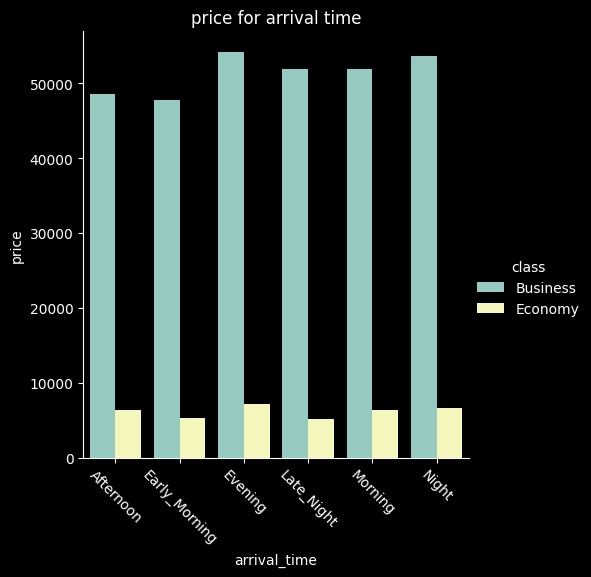

In [17]:
# showing the relation between the price and time 
plt.Figure(figsize=(4,2))
chart=sns.catplot(x=departure_time_price['departure_time'],y=departure_time_price['price'],hue='class',data=departure_time_price,kind='bar')
plt.ylabel("price")
plt.xlabel("departure_time")
plt.title("price for departure time")
plt.tick_params(axis='x',rotation=-45)

plt.Figure(figsize=(4,2))
chart2=sns.catplot(x=arrival_time_price['arrival_time'],y = arrival_time_price['price'],hue='class',data=arrival_time_price,kind='bar')
plt.ylabel("price")
plt.xlabel("arrival_time")
plt.title("price for arrival time")
plt.tick_params(axis='x',rotation=-45)

plt.show()

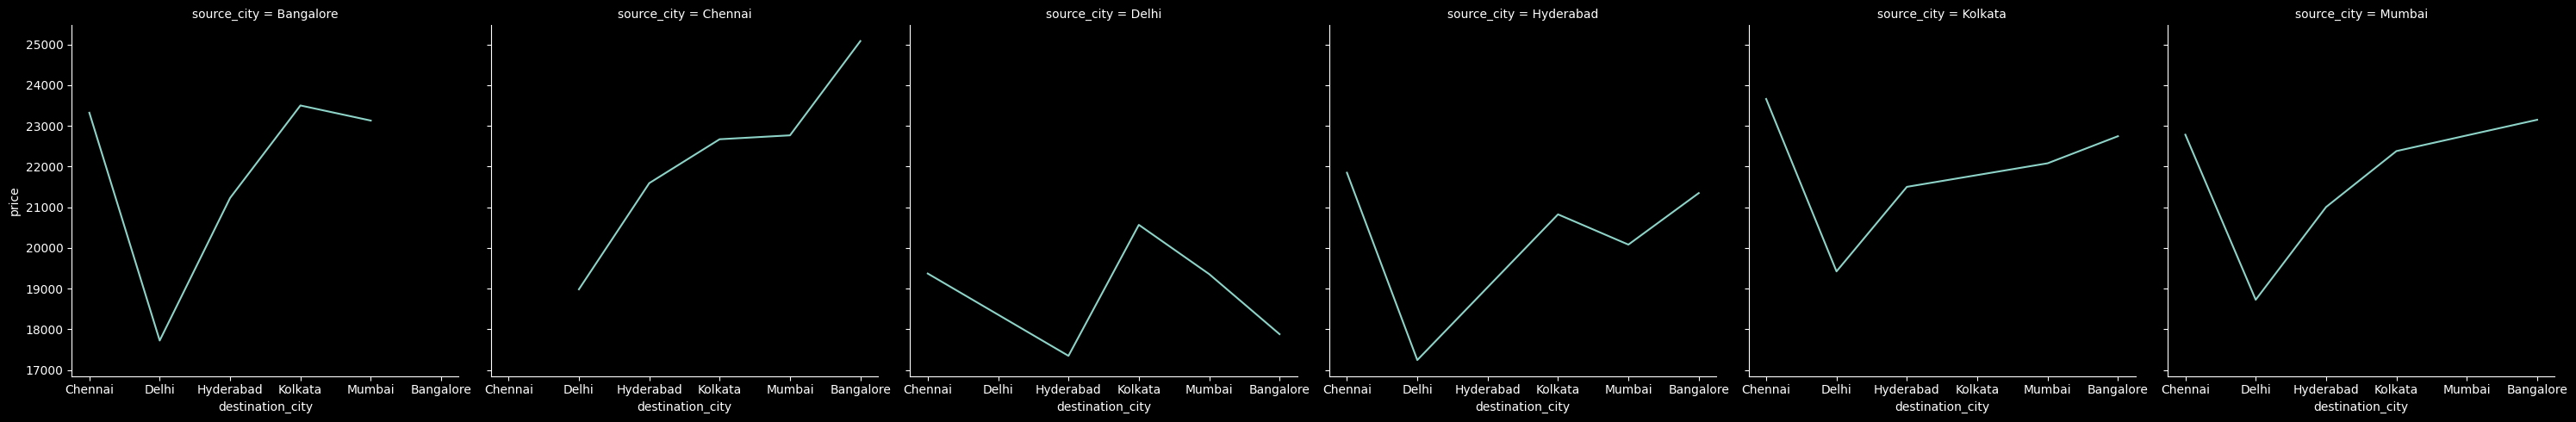

In [18]:
# showing relation between price and source\destination city 

source_city_price = data.groupby("source_city")["price"].mean().reset_index()

destinatoin_city_price= data.groupby("destination_city")["price"].mean().reset_index()

city_price = data.groupby(["source_city","destination_city"])["price"].mean().reset_index()

chart3=sns.relplot(x=city_price["destination_city"] ,y=city_price["price"],kind="line",col=city_price["source_city"],data=data)

plt.show()